In [1]:
from pyvis.network import Network
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import networkx as nx
import heapq
from collections import deque



In [2]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U nbformat

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pyvis


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
def dfs_spanning_tree(N, adj, start):
    visited = [False]*(N+1)
    tree_edges = []
    def dfs(u):
        visited[u] = True
        for v, w in adj[u]:
            if not visited[v]:
                tree_edges.append((u, v, w))
                dfs(v)
    dfs(start)
    return tree_edges


In [6]:
def bfs_spanning_tree(N, adj, start):
    visited = [False]*(N+1)
    q = deque([start])
    tree_edges = []
    visited[start] = True
    while q:
        u = q.popleft()
        for v, w in adj[u]:
            if not visited[v]:
                visited[v] = True
                tree_edges.append((u, v, w))
                q.append(v)
    return tree_edges


In [7]:
def dijkstra(N, adj, src, tgt):
    dist = [float('inf')]*(N+1)
    prev = [None]*(N+1)
    dist[src] = 0
    pq = [(0, src)]
    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in adj[u]:
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                prev[v] = u
                heapq.heappush(pq, (dist[v], v))
    path = []
    u = tgt
    while u is not None:
        path.append(u)
        u = prev[u]
    path.reverse()
    return dist[tgt], path


In [8]:
def prim_mst(N, edges):
    adj = [[] for _ in range(N+1)]
    for u, v, w in edges:
        adj[u].append((v, w))
        adj[v].append((u, w))
    visited = [False]*(N+1)
    pq = [(0, 1, -1)]
    mst_edges = []
    while pq:
        w, u, p = heapq.heappop(pq)
        if visited[u]:
            continue
        visited[u] = True
        if p != -1:
            mst_edges.append((p, u, w))
        for v, c in adj[u]:
            if not visited[v]:
                heapq.heappush(pq, (c, v, u))
    return mst_edges


In [9]:
def display_graph_matplotlib(edges):
    G = nx.Graph()
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=14, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()


In [10]:
def display_graph_interactive(N, edges):
    net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True)
    for i in range(1, N+1):
        net.add_node(i, label=str(i))
    for u, v, w in edges:
        net.add_edge(u, v, value=w, title=f"Weight: {w}")
    net.show("graph.html")
    with open("graph.html", "r", encoding="utf-8") as f:
        html_content = f.read()
    display(HTML(html_content))


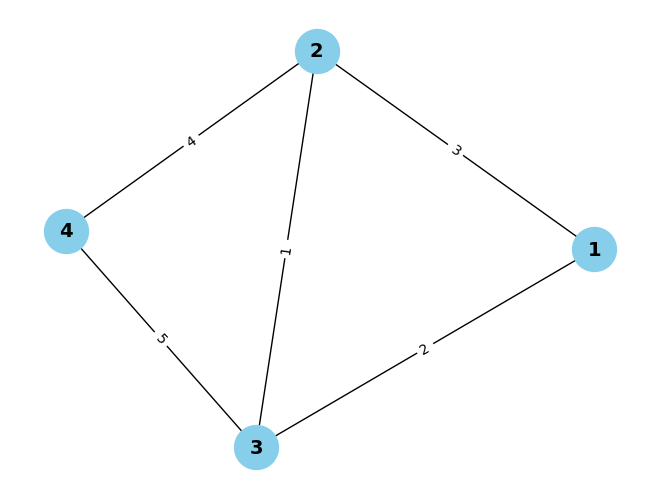

Shortest path 1 → 4 = [1, 3, 4], distance = 7
Prim's MST: [(1, 3, 2), (3, 2, 1), (2, 4, 4)]


NameError: name 'kruskal_mst' is not defined

In [11]:
N = 4
edges = [
    (1, 2, 3),
    (1, 3, 2),
    (2, 3, 1),
    (2, 4, 4),
    (3, 4, 5)
]
adj = [[] for _ in range(N+1)]
for u, v, w in edges:
    adj[u].append((v, w))
    adj[v].append((u, w))

# 1️⃣ แสดงกราฟแบบ static (matplotlib)
display_graph_matplotlib(edges)

# 3️⃣ ทดสอบ Dijkstra
dist, path = dijkstra(N, adj, 1, 4)
print(f"Shortest path 1 → 4 = {path}, distance = {dist}")

# 4️⃣ ทดสอบ Prim’s MST
print("Prim's MST:", prim_mst(N, edges))

# 5️⃣ ทดสอบ Kruskal’s MST
print("Kruskal's MST:", kruskal_mst(N, edges))


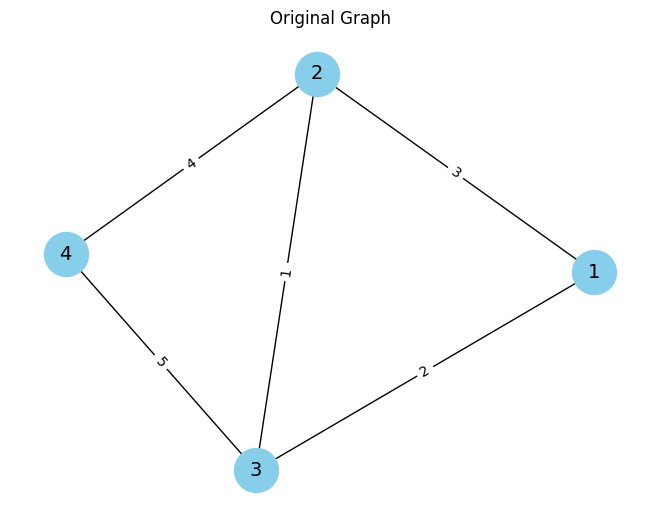

Shortest path 1 → 4 = [1, 3, 4], distance = 7


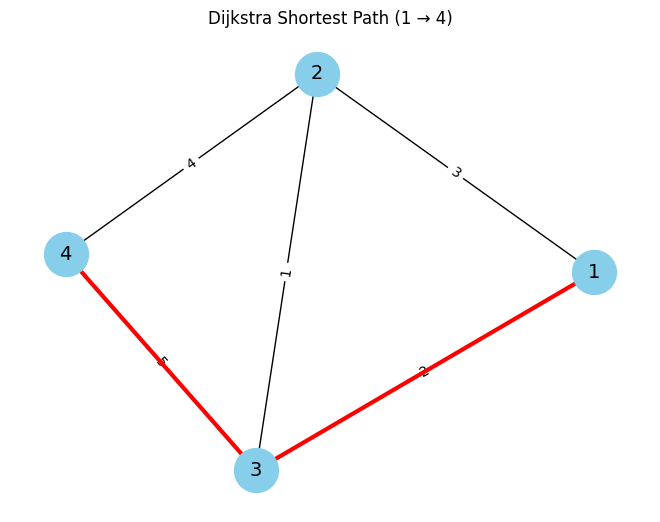

Prim's MST: [(1, 3, {'weight': 2}), (2, 3, {'weight': 1}), (2, 4, {'weight': 4})]


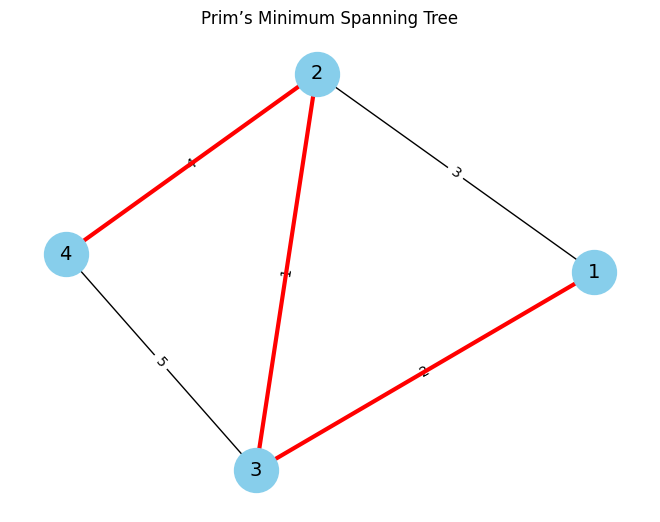

Kruskal's MST: [(1, 3, {'weight': 2}), (2, 3, {'weight': 1}), (2, 4, {'weight': 4})]


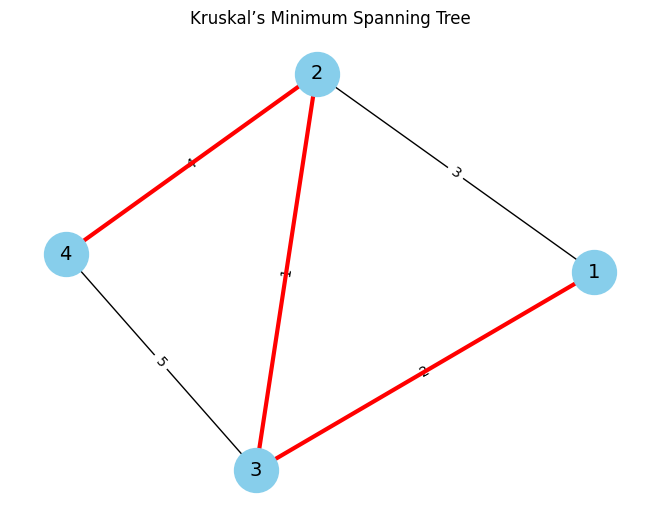

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# ---------- ฟังก์ชันแสดงกราฟ ----------
def display_graph(edges, highlight_edges=None, title="Graph"):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G, seed=42)
    weights = nx.get_edge_attributes(G, 'weight')

    # วาดโหนด + ขอบทั้งหมด
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=14)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

    # ถ้ามีเส้นที่จะไฮไลต์ (เส้นทางหรือ MST)
    if highlight_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlight_edges, width=3, edge_color='red')

    plt.title(title)
    plt.show()


# ---------- Dijkstra ----------
def dijkstra(N, adj, start, end):
    dist = [float('inf')] * (N + 1)
    prev = [None] * (N + 1)
    dist[start] = 0
    pq = [(0, start)]

    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in adj[u]:
            if dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                prev[v] = u
                heapq.heappush(pq, (dist[v], v))

    # สร้างเส้นทาง
    path = []
    v = end
    while v is not None:
        path.append(v)
        v = prev[v]
    path = path[::-1]

    # สร้างขอบของเส้นทาง
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]

    return dist[end], path, path_edges


# ---------- Prim ----------
def prim_mst(N, edges):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    mst = nx.minimum_spanning_tree(G, algorithm='prim')
    return list(mst.edges(data=True))


# ---------- Kruskal ----------
def kruskal_mst(N, edges):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    mst = nx.minimum_spanning_tree(G, algorithm='kruskal')
    return list(mst.edges(data=True))


# ---------- ทดสอบ ----------
N = 4
edges = [
    (1, 2, 3),
    (1, 3, 2),
    (2, 3, 1),
    (2, 4, 4),
    (3, 4, 5)
]
adj = [[] for _ in range(N + 1)]
for u, v, w in edges:
    adj[u].append((v, w))
    adj[v].append((u, w))


# 1️⃣ กราฟพื้นฐาน
display_graph(edges, title="Original Graph")

# 2️⃣ Dijkstra
dist, path, path_edges = dijkstra(N, adj, 1, 4)
print(f"Shortest path 1 → 4 = {path}, distance = {dist}")
display_graph(edges, highlight_edges=path_edges, title="Dijkstra Shortest Path (1 → 4)")

# 3️⃣ Prim’s MST
prim_edges = prim_mst(N, edges)
prim_highlight = [(u, v) for u, v, w in [(u, v, d['weight']) for u, v, d in prim_edges]]
print("Prim's MST:", prim_edges)
display_graph(edges, highlight_edges=prim_highlight, title="Prim’s Minimum Spanning Tree")

# 4️⃣ Kruskal’s MST
kruskal_edges = kruskal_mst(N, edges)
kruskal_highlight = [(u, v) for u, v, w in [(u, v, d['weight']) for u, v, d in kruskal_edges]]
print("Kruskal's MST:", kruskal_edges)
display_graph(edges, highlight_edges=kruskal_highlight, title="Kruskal’s Minimum Spanning Tree")


In [14]:
import sys
!{sys.executable} -m pip install --upgrade nbformat


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [15]:
pip install ipykernel

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install --upgrade nbformat


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
import plotly.graph_objects as go
import networkx as nx
import heapq
import random

# ---------- ฟังก์ชันสุ่มพิกัด 3D ----------
def random_3d_positions(G):
    pos = {}
    for node in G.nodes():
        pos[node] = (
            random.uniform(-1, 1),
            random.uniform(-1, 1),
            random.uniform(-1, 1)
        )
    return pos

# ---------- วาดกราฟแบบ 3D ----------
def draw_3d_graph(edges, highlight_edges=None, title="3D Graph"):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = random_3d_positions(G)
    
    # edge lines
    edge_x, edge_y, edge_z = [], [], []
    for u, v, w in edges:
        edge_x += [pos[u][0], pos[v][0], None]
        edge_y += [pos[u][1], pos[v][1], None]
        edge_z += [pos[u][2], pos[v][2], None]

    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        line=dict(width=2, color='lightgray'),
        hoverinfo='none', mode='lines'
    )

    # highlight edges
    if highlight_edges:
        hx, hy, hz = [], [], []
        for u, v in highlight_edges:
            hx += [pos[u][0], pos[v][0], None]
            hy += [pos[u][1], pos[v][1], None]
            hz += [pos[u][2], pos[v][2], None]
        highlight_trace = go.Scatter3d(
            x=hx, y=hy, z=hz,
            line=dict(width=6, color='magenta'),
            hoverinfo='none', mode='lines'
        )
    else:
        highlight_trace = None

    # node points
    node_x, node_y, node_z, node_text = [], [], [], []
    for node in G.nodes():
        node_x.append(pos[node][0])
        node_y.append(pos[node][1])
        node_z.append(pos[node][2])
        node_text.append(str(node))

    node_trace = go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers+text',
        text=node_text,
        textposition="top center",
        marker=dict(
            size=15,
            color=[random.choice(["#FFB6C1", "#87CEFA", "#98FB98", "#FFD700", "#FFA07A"]) for _ in G.nodes()],
            line=dict(width=2, color='black')
        )
    )

    data = [edge_trace, node_trace]
    if highlight_trace:
        data.insert(1, highlight_trace)

    fig = go.Figure(data=data)
    fig.update_layout(
        title=title,
        showlegend=False,
        scene=dict(
            xaxis=dict(showbackground=False, visible=False),
            yaxis=dict(showbackground=False, visible=False),
            zaxis=dict(showbackground=False, visible=False)
        ),
        margin=dict(l=0, r=0, t=40, b=0)
    )
    fig.show()

# ---------- Dijkstra ----------
def dijkstra(N, adj, start, end):
    dist = [float('inf')] * (N + 1)
    prev = [None] * (N + 1)
    dist[start] = 0
    pq = [(0, start)]

    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in adj[u]:
            if dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                prev[v] = u
                heapq.heappush(pq, (dist[v], v))

    path = []
    v = end
    while v is not None:
        path.append(v)
        v = prev[v]
    path = path[::-1]

    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    return dist[end], path, path_edges

# ---------- MST ----------
def mst_prim(N, edges):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    mst = nx.minimum_spanning_tree(G, algorithm='prim')
    return list(mst.edges())

def mst_kruskal(N, edges):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    mst = nx.minimum_spanning_tree(G, algorithm='kruskal')
    return list(mst.edges())


# ---------- MAIN ----------
N = 4
edges = [
    (1, 2, 3),
    (1, 3, 2),
    (2, 3, 1),
    (2, 4, 4),
    (3, 4, 5)
]
adj = [[] for _ in range(N + 1)]
for u, v, w in edges:
    adj[u].append((v, w))
    adj[v].append((u, w))

# 1️⃣ กราฟรวม
draw_3d_graph(edges, title="🌈 Original 3D Graph")

# 2️⃣ Dijkstra
dist, path, path_edges = dijkstra(N, adj, 1, 4)
print(f"Shortest path 1→4: {path}, distance = {dist}")
draw_3d_graph(edges, highlight_edges=path_edges, title="💫 Dijkstra Shortest Path (1→4)")

# 3️⃣ Prim’s MST
prim_edges = mst_prim(N, edges)
print("Prim’s MST:", prim_edges)
draw_3d_graph(edges, highlight_edges=prim_edges, title="🌿 Prim’s Minimum Spanning Tree")

# 4️⃣ Kruskal’s MST
kruskal_edges = mst_kruskal(N, edges)
print("Kruskal’s MST:", kruskal_edges)
draw_3d_graph(edges, highlight_edges=kruskal_edges, title="🌸 Kruskal’s Minimum Spanning Tree")


Shortest path 1→4: [1, 3, 4], distance = 7


Prim’s MST: [(1, 3), (2, 3), (2, 4)]


Kruskal’s MST: [(1, 3), (2, 3), (2, 4)]


In [19]:
import plotly.graph_objects as go
import numpy as np

# สร้างข้อมูลจำลอง (พื้นผิวแบบภูเขา)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2)) * 5  # ความสูง

# สร้างกราฟแบบ Hologram
fig = go.Figure(data=[
    go.Surface(
        x=X, y=Y, z=Z,
        colorscale=[  # ไล่สีเอง
            [0, "rgb(0,0,255)"],     # ฟ้า = ต่ำ
            [0.5, "rgb(0,255,255)"], # เขียวฟ้า = กลาง
            [1, "rgb(255,0,0)"]      # แดง = สูง
        ],
        showscale=True,
        opacity=0.9,
    )
])

# ปรับแต่งเอฟเฟกต์โฮโลแกรม
fig.update_layout(
    title="💎 3D Volume Hologram (Red=High, Blue=Low)",
    scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False),
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.8)),
    ),
    paper_bgcolor="black",
    plot_bgcolor="black",
)

fig.show()


In [21]:
import plotly.graph_objects as go
import numpy as np

# ====== ข้อมูลตัวอย่าง Tree (u, v, depth/weight) ======
edges = [
    (1, 2, 1),
    (1, 3, 2),
    (2, 4, 3),
    (2, 5, 4),
    (3, 6, 3),
    (3, 7, 5)
]

# ====== สร้างตำแหน่งโหนดใน 3D ======
# ยิ่ง depth มาก ยิ่งสูงขึ้น (z สูงขึ้น)
nodes = {}
for u, v, w in edges:
    if u not in nodes:
        nodes[u] = np.array([np.random.uniform(-5, 5), np.random.uniform(-5, 5), w])
    if v not in nodes:
        nodes[v] = np.array([np.random.uniform(-5, 5), np.random.uniform(-5, 5), w + np.random.uniform(0.5, 1.5)])

# ====== เตรียมจุดและเส้น ======
Xn, Yn, Zn = [], [], []  # จุดของโหนด
Xe, Ye, Ze = [], [], []  # เส้นของ edge
colors = []

for node, pos in nodes.items():
    Xn.append(pos[0])
    Yn.append(pos[1])
    Zn.append(pos[2])

for u, v, w in edges:
    Xe += [nodes[u][0], nodes[v][0], None]
    Ye += [nodes[u][1], nodes[v][1], None]
    Ze += [nodes[u][2], nodes[v][2], None]
    colors.append(w)

# ====== ไล่สี hologram (ฟ้า→แดง ตามความสูง) ======
def color_scale(value, vmin, vmax):
    ratio = (value - vmin) / (vmax - vmin)
    r = int(255 * ratio)
    b = int(255 * (1 - ratio))
    return f'rgb({r},0,{b})'

min_z, max_z = min(Zn), max(Zn)
edge_colors = [color_scale(nodes[v][2], min_z, max_z) for _, v, _ in edges]

# ====== สร้างกราฟ 3D ======
fig = go.Figure()

# เส้น (Edges)
for i, (u, v, w) in enumerate(edges):
    fig.add_trace(go.Scatter3d(
        x=[nodes[u][0], nodes[v][0]],
        y=[nodes[u][1], nodes[v][1]],
        z=[nodes[u][2], nodes[v][2]],
        mode='lines',
        line=dict(color=edge_colors[i], width=6),
        hoverinfo='none'
    ))

# จุด (Nodes)
fig.add_trace(go.Scatter3d(
    x=Xn, y=Yn, z=Zn,
    mode='markers+text',
    marker=dict(size=8, color=Zn, colorscale='RdBu', showscale=True),
    text=[f"Node {i}" for i in nodes.keys()],
    textposition="top center"
))

# ====== จัด layout hologram ======
fig.update_layout(
    title="🌈 3D Hologram Tree (Red = High, Blue = Low)",
    scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False),
        camera=dict(eye=dict(x=1.6, y=1.6, z=0.8)),
    ),
    paper_bgcolor="black",
    plot_bgcolor="black",
    showlegend=False
)

fig.show()


In [18]:
from pyvis.network import Network
from IPython.display import HTML, display
import tempfile, os

def display_graph_interactive(N, edges):
    net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True)
    
    for i in range(1, N+1):
        net.add_node(i, label=str(i))
    for u, v, w in edges:
        net.add_edge(u, v, value=w, title=f"Weight: {w}")

    # ✅ สร้างไฟล์ในที่ปลอดภัย (ชั่วคราว)
    temp_dir = tempfile.gettempdir()
    html_path = os.path.join(temp_dir, "graph.html")

    net.save_graph(html_path)  # ใช้ save_graph แทน show เพื่อไม่เรียก browser
    
    with open(html_path, "r", encoding="utf-8") as f:
        html_content = f.read()
    display(HTML(html_content))


## tree